<a href="https://colab.research.google.com/github/HwangHanJae/ml-definitive-guide-pratice/blob/main/classification/decision_tree_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#결정 트리 실습 - 사용자 행동 인식 데이터 세트
##### [UCI 머신러닝 리포지토리(Machine Learning Repository)에서 제공하는 사용자 인식(Humal Acticity Recognition)](https://archive.ics.uci.edu/ml/datasets/Human+Activity+Recognition+Using+Smartphones) 데이터 세트의 예측 분류

전체 데이터를 확인하기 전에 간단히 피처명만 확인

In [2]:
import pandas as pd

file_path = "/content/drive/MyDrive/Colab Notebooks/DataScience/Data/uci_humal_activity/features.txt"
#features.txt 파일에는 피처 이름 index와 피처명이 공백으로 분리 되어 있음.
#이를 DataFrame으로 로드
feature_name_df = pd.read_csv(file_path, sep='\s+', header=None, names=["column_index", "column_name"])

#피처명 index를 제거하고, 피처명만 리스트 객체로 생성한뒤 샘플로 10개만 추출
feture_name = feature_name_df.iloc[:, 1].values.tolist()
print("전체 피처명에서 10개만 추출", feture_name[:10])

전체 피처명에서 10개만 추출 ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X']


피처명을 확인해보면 인체의 움직임과 관련된 속성의 평균/표준편차가  
X, Y ,Z축 값으로 되어있음을 알 수 있다.



학습/테스트 데이터를 로드하고, 레이블의 칼럼은 'action'으로 변경  
해당 데이터 세트를 DataFrame으로 생성하는 함수를 작성

중복 feature명에 대하여 원본 feature 명에 '_1(또는 _2)'를 추가로 부여하는 함수생성

In [3]:
import pandas as pd
### features.txt 파일에 있는 컬럼명을 입력 받아서 중복된 컬럼명은 원본 컬럼명+_1, _2와 같이 중복된 차수를 원본 컬럼명에 더해서 컬럼명을 update 하는 함수임. . 
def get_new_feature_name_df(old_feature_name_df):
    #column_name으로 중복된 컬럼명에 대해서는 중복 차수 부여, col1, col1과 같이 2개의 중복 컬럼이 있을 경우 1, 2 
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(), columns=['dup_cnt'])
    # feature_dup_df의 index인 column_name을 reset_index()를 이용하여 컬럼으로 변환. 
    feature_dup_df = feature_dup_df.reset_index()
    # 인자로 받은 features_txt의 컬럼명 DataFrame과 feature_dup_df를 조인. 
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    # 새로운 컬럼명은 앞에 중복 차수를 접미어로 결합. 
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1]) 
                                                                                           if x[1] >0 else x[0] ,  axis=1)
    new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
    return new_feature_name_df

In [4]:
def get_human_dataset():
 
  file_path = "/content/drive/MyDrive/Colab Notebooks/DataScience/Data/uci_humal_activity/features.txt"
  #각 데이터 파일들은 공백으로 구분되어 있으므로 read_csv에서 공백 문자를 sep으로 할당
  feature_name_df = pd.read_csv(file_path, sep='\s+', header=None, names=["column_index", "column_name"])
  

 #중복된 feature명을 새롭게 수정하는 get_new_feature_name_df()를 이용하여 새로운 feature명 DataFrame생성. 
  new_feature_name_df = get_new_feature_name_df(feature_name_df)
  #DataFrame에 피처명을 칼럼으로 부여하기 위해 리스트 객체로 다시 반환
  feature_name = new_feature_name_df.iloc[:, 1].values.tolist()

  #학습 피처 데이터 세트(X_train) / 테스트 피처 데이터 세트(X_test)를 DataFrame으로 로딩
  #칼럼명은 feature_name을 사용
  X_train_path = "/content/drive/MyDrive/Colab Notebooks/DataScience/Data/uci_humal_activity/train/X_train.txt"
  X_test_path = "/content/drive/MyDrive/Colab Notebooks/DataScience/Data/uci_humal_activity/test/X_test.txt"
  X_train = pd.read_csv(X_train_path, sep='\s+',names = feature_name)
  X_test = pd.read_csv(X_test_path, sep='\s+',names = feature_name)

  #학습 레이블 데이터(y_train) / 테스트 레이블 데이트(y_test)를 DataFrame으로 로딩
  #칼럼명은 action으로 사용
  y_train_path = "/content/drive/MyDrive/Colab Notebooks/DataScience/Data/uci_humal_activity/train/y_train.txt"
  y_test_path = "/content/drive/MyDrive/Colab Notebooks/DataScience/Data/uci_humal_activity/test/y_test.txt"
  y_train = pd.read_csv(y_train_path, sep='\s+', header = None, names=["action"])
  y_test = pd.read_csv(y_test_path, sep='\s+', header = None, names=["action"])

  #로드된 학습/테스트용 DataFrame 모두 반환
  return X_train, X_test, y_train, y_test

In [5]:
X_train, X_test, y_train, y_test = get_human_dataset()

In [6]:
print("## 학습 피처 데이터 세트 info()")
print(X_train.info())

## 학습 피처 데이터 세트 info()
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB
None


학습 데이터 세트는 7532개의 레코드로 561개의 피처를 가지고 있음  
피처는 전부 float64 숫자 형으로 별도의 카테고리 인코딩을 수행할 필요는 없음

In [8]:
print("레이블 값의 분포 : ")
print(y_train.value_counts())

레이블 값의 분포 : 
action
6         1407
5         1374
4         1286
1         1226
2         1073
3          986
dtype: int64


레이블 값은 1,2,3,4,5,6으로 비교적 고르게 분포되어 있음

In [9]:
#DecisionTreeClassifier를 이용해 동작 예측 분류 수행
#하이퍼 파라미터는 모두 default로

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import numpy as np
dt_clf = DecisionTreeClassifier(random_state= 156)
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print(f"결정 트리의 예측 정확도 : {np.round(accuracy, 4)}")

결정 트리의 예측 정확도 : 0.8548


In [10]:
#DecisionTreeClassifier의 기본 하이퍼 마라피터 추출
print(f"{dt_clf.__class__.__name__}의 기본 하이퍼 파라미터 :\n{dt_clf.get_params()}")

DecisionTreeClassifier의 기본 하이퍼 파라미터 :
{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 156, 'splitter': 'best'}


모델은 약 85%의 정확도를 나타내고 있음.  
결정 트리의 트리 깊이(max_depth)가 예측 정확도에 주는 영향을 살피겠음

In [16]:
#GridSearchCV를 사용 cv=5, max_depth는 6부터 올리도록 함
from sklearn.model_selection import GridSearchCV

params = {"max_depth" : [6, 8, 10, 12, 16, 20, 24]}

grid_cv = GridSearchCV(dt_clf, param_grid=params, cv=5, scoring='accuracy', verbose= 1,return_train_score=True)
grid_cv.fit(X_train, y_train)

print(f"GridSearchCV 최고 평균 정확도 수치 : {np.round(grid_cv.best_score_, 4)}")
print(f"GridSearchCV 최적 하이퍼 파라미터 : {grid_cv.best_params_}")


Fitting 5 folds for each of 7 candidates, totalling 35 fits
GridSearchCV 최고 평균 정확도 수치 : 0.8513
GridSearchCV 최적 하이퍼 파라미터 : {'max_depth': 16}


max_depth가 16일때 85%정도로 최고 평균 정확도가 도출

max_depth의 증가에 따라 예측 성능이 어떻게 변했는지 확인  
cv_results_ 속성에 성능 수치를 가지고 있음
- max_depth
- 평가 데이터 세트의 평균 정확도 수치('mean_test_score')
- 학습 데이터 세트의 평균 정확도 수치('mean_train_score')

위의 항목을 확인

In [18]:
#GridSearchCV 객체의 cv_results_ 속성을 DataFrame으로 생성
cv_results_df = pd.DataFrame(grid_cv.cv_results_)

#항목 확인
cv_results_df[["param_max_depth","mean_test_score","mean_train_score"]]

,param_max_depth,mean_test_score,mean_train_score
0,6,0.850791,0.944879
1,8,0.851069,0.982692
2,10,0.851209,0.993403
3,12,0.844135,0.997212
4,16,0.851344,0.999660
5,20,0.850800,0.999966
6,24,0.849440,1.000000


max_depth가 높아질수록 학습 데이터 세트의 정확도 수치가 100%에 이르지만  
평가 데이트 세트의 정확도 수치는 max_depth = 16에서 최대, 그 이후로는 낮아지고 있다.

과적합의 모습을 보이고 있음

테스트 데이터 세트에서 max_depth의 변화를 확인

In [19]:
max_depths = [6,8,10,12,16,20,24]
for max_depth in max_depths:
  dt_clf = DecisionTreeClassifier(max_depth= max_depth, random_state=156)
  dt_clf.fit(X_train, y_train)
  pred = dt_clf.predict(X_test)
  accuracy = accuracy_score(y_test, pred)
  print(f"max_depth = {max_depth} 정확도 : {np.round(accuracy, 4)}")

max_depth = 6 정확도 : 0.8558
max_depth = 8 정확도 : 0.8707
max_depth = 10 정확도 : 0.8673
max_depth = 12 정확도 : 0.8646
max_depth = 16 정확도 : 0.8575
max_depth = 20 정확도 : 0.8548
max_depth = 24 정확도 : 0.8548


max_depth가 8일때 87%정도로 가장 높았고, max_depth가 8을 넘어가면서 정확도가 낮아지는 것을 볼 수 있음

max_depth는 과적합의 영향력이 커지므로 하이퍼 파라미터를 이용해 깊이를 제어해야 함

max_depth와 min_samples_split을 같이 변경하면서 튜닝

In [20]:
params = {"max_depth": [8, 12, 16, 20, 24],
          "min_samples_split" : [16, 24]}

grid_cv =GridSearchCV(dt_clf, param_grid=params, cv=5, scoring="accuracy",verbose=1)
grid_cv.fit(X_train, y_train)
print(f"GridSearchCV 최고 평균 정확도 수치 : {np.round(grid_cv.best_score_,4)}")
print(f"GridSearchCV 최적 하이퍼 파라미터 : {grid_cv.best_params_}")

Fitting 5 folds for each of 10 candidates, totalling 50 fits
GridSearchCV 최고 평균 정확도 수치 : 0.8549
GridSearchCV 최적 하이퍼 파라미터 : {'max_depth': 8, 'min_samples_split': 16}


max_depth = 8 , min_samples_split = 16 일때 최고 평균 정확도 85% 정도로 나타남.

bese_estimator_로 테스트 데이터 세트를 예측

In [21]:
best_df_clf = grid_cv.best_estimator_
pred = best_df_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print(f"결정 트리 예측 정확도 : {np.round(accuracy, 4)}")

결정 트리 예측 정확도 : 0.8717


max_depth = 8 , min_samples_split = 16 일때 결정 트리 예측 정확도가 87% 정도로 나타남.

중요도가 높은 순으로 Top 20 피처의 중요도 확인

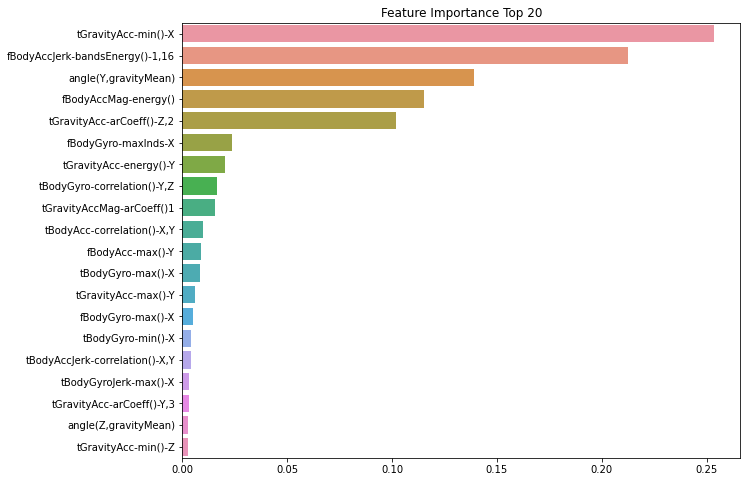

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
feature_importance = best_df_clf.feature_importances_

#Top 중요도로 정렬을 쉽게하고, seaborn 막대그래프로 쉽게 표현하기 위해 Series로 변환
feature_importance = pd.Series(feature_importance, index=X_train.columns)

#중요도 값순으로 Sereis를 정렬
top20 = feature_importance.sort_values(ascending=False)[:20]
plt.figure(figsize=(10,8))
plt.title("Feature Importance Top 20")
sns.barplot(x=top20, y=top20.index)
plt.show()

막대 그래프의 Top 5 피처가 결정 트리 규칙생성에 중요한 영향을 미치고 있음.